In [1]:
import pyarrow.feather as feather
import pandas as pd
# 设置 Pandas 显示选项
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.width', 200)       # 设置显示宽度，防止换行
pd.set_option('display.max_rows', 20)      # 只显示 20 行数据（可根据需要调整）
# 文件路径
file_path = "/mnt/nvme2/yyc/medical-coding/files/data/mimiciii_50/mimiciii_50.feather"
# 读取 feather 文件
data = feather.read_table(file_path)
# 转换为 pandas DataFrame
df = data.to_pandas()
# 打印数据框
print(df)

       subject_id     _id      DESCRIPTION                                               text                                             cpt_id                                          icd9_diag  \
0               3  145834           Report  admission date discharge date date of birth se...                                     [94003, 94002]                      [428.0, 410.71, 038.9, 584.9]   
1               4  185777           Report  admission date discharge date date of birth se...                [99231, 99238, 99232, 99233, 99223]                                                 []   
2               6  107064           Report  admission date discharge date date of birth se...         [99231, 99239, 99291, 99232, 99233, 99255]                                    [285.9, V15.82]   
3               9  150750  Report+Addendum  admission date discharge date date of birth se...                                            [94003]                       [428.0, 401.9, 507.0, 584.9]   
4    

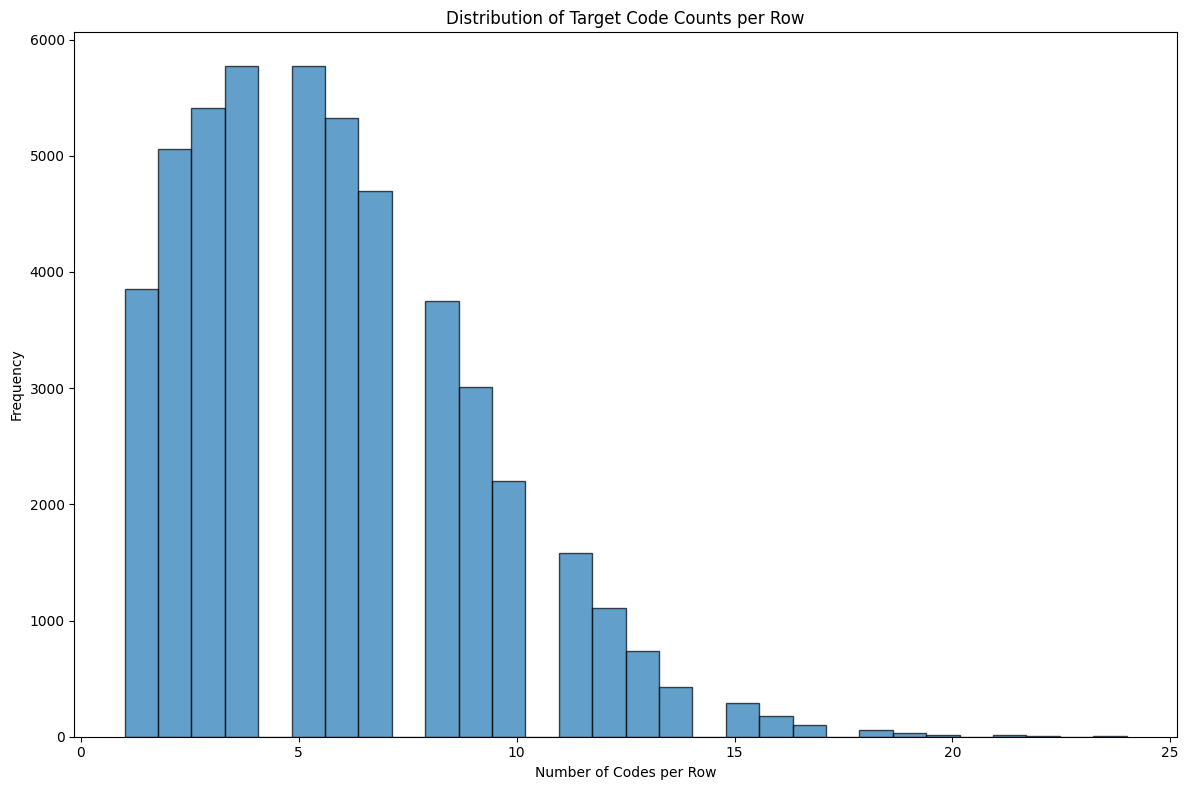

count    49414.000000
mean         5.744425
std          3.345012
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         24.000000
Name: target_count, dtype: float64


In [2]:
import matplotlib.pyplot as plt
# 统计每一行 target 列中编码的数量
df['target_count'] = df['target'].apply(len)

# 绘制统计结果的分布图
plt.figure(figsize=(12, 8))
plt.hist(df['target_count'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Target Code Counts per Row')
plt.xlabel('Number of Codes per Row')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 显示统计结果的汇总信息
target_count_summary = df['target_count'].describe()
print(target_count_summary)

In [3]:
print(df)

       subject_id     _id      DESCRIPTION                                               text                                             cpt_id                                          icd9_diag  \
0               3  145834           Report  admission date discharge date date of birth se...                                     [94003, 94002]                      [428.0, 410.71, 038.9, 584.9]   
1               4  185777           Report  admission date discharge date date of birth se...                [99231, 99238, 99232, 99233, 99223]                                                 []   
2               6  107064           Report  admission date discharge date date of birth se...         [99231, 99239, 99291, 99232, 99233, 99255]                                    [285.9, V15.82]   
3               9  150750  Report+Addendum  admission date discharge date date of birth se...                                            [94003]                       [428.0, 401.9, 507.0, 584.9]   
4    

In [4]:
def assign_difficulty(target_count):
    if target_count <= 5:
        return "easy"
    elif 5 < target_count <= 10:
        return "middle"
    else:
        return "hard"
    
# 应用划分逻辑
df['difficulty'] = df['target_count'].apply(assign_difficulty)
print(df)
# 保存为新文件
output_path = "/mnt/nvme2/yyc/medical-coding/files/data/mimiciii_50/mimiciii_50_difficulty_from_targets.feather"
df.to_feather(output_path)

output_path

       subject_id     _id      DESCRIPTION                                               text                                             cpt_id                                          icd9_diag  \
0               3  145834           Report  admission date discharge date date of birth se...                                     [94003, 94002]                      [428.0, 410.71, 038.9, 584.9]   
1               4  185777           Report  admission date discharge date date of birth se...                [99231, 99238, 99232, 99233, 99223]                                                 []   
2               6  107064           Report  admission date discharge date date of birth se...         [99231, 99239, 99291, 99232, 99233, 99255]                                    [285.9, V15.82]   
3               9  150750  Report+Addendum  admission date discharge date date of birth se...                                            [94003]                       [428.0, 401.9, 507.0, 584.9]   
4    

'/mnt/nvme2/yyc/medical-coding/files/data/mimiciii_50/mimiciii_50_difficulty_from_targets.feather'